# Parcial - Aprendizaje de Maquina

#### Nombre Alumno: Linda Dayana Herrera Llamas
#### Fecha: 30/09/2023

## Descargar datos y librerias

In [65]:
# Librerias

import warnings
warnings.filterwarnings('ignore')

import pandas as pd

import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OneHotEncoder

import mglearn
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
#from sklearn.linear_model import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

- Descargar datos en 4 varibles

In [2]:
#archivo1 = pd.read_csv('C:/ProgramasML/ML/Ejemplosclase/DatosParcial/fraud_detection/test_identity.csv')
#archivo2 = pd.read_csv('C:/ProgramasML/ML/Ejemplosclase/DatosParcial/fraud_detection/test_transaction.csv')
archivo3 = pd.read_csv('C:/ProgramasML/ML/Ejemplosclase/DatosParcial/fraud_detection/train_identity.csv')
archivo4 = pd.read_csv('C:/ProgramasML/ML/Ejemplosclase/DatosParcial/fraud_detection/train_transaction.csv')



- Hacer merge para datos de train

In [3]:
datatrain = pd.merge(archivo3,archivo4, on='TransactionID', how='left')

## EDA - Datos Faud Detection

- Descripción de tipos de varibles

In [4]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Columns: 434 entries, TransactionID to V339
dtypes: float64(399), int64(4), object(31)
memory usage: 477.6+ MB


Tenemos un conjunto de datos que se compone de 141.233 filas u observaciones con 433 columnas o catacteristicas, 399 son reales (float), 4 son enteros y 31 tipo object.

In [5]:
nombres_caracteristicas = datatrain.columns.tolist()
for nombre in nombres_caracteristicas:
    print(nombre)

TransactionID
id_01
id_02
id_03
id_04
id_05
id_06
id_07
id_08
id_09
id_10
id_11
id_12
id_13
id_14
id_15
id_16
id_17
id_18
id_19
id_20
id_21
id_22
id_23
id_24
id_25
id_26
id_27
id_28
id_29
id_30
id_31
id_32
id_33
id_34
id_35
id_36
id_37
id_38
DeviceType
DeviceInfo
isFraud
TransactionDT
TransactionAmt
ProductCD
card1
card2
card3
card4
card5
card6
addr1
addr2
dist1
dist2
P_emaildomain
R_emaildomain
C1
C2
C3
C4
C5
C6
C7
C8
C9
C10
C11
C12
C13
C14
D1
D2
D3
D4
D5
D6
D7
D8
D9
D10
D11
D12
D13
D14
D15
M1
M2
M3
M4
M5
M6
M7
M8
M9
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
V29
V30
V31
V32
V33
V34
V35
V36
V37
V38
V39
V40
V41
V42
V43
V44
V45
V46
V47
V48
V49
V50
V51
V52
V53
V54
V55
V56
V57
V58
V59
V60
V61
V62
V63
V64
V65
V66
V67
V68
V69
V70
V71
V72
V73
V74
V75
V76
V77
V78
V79
V80
V81
V82
V83
V84
V85
V86
V87
V88
V89
V90
V91
V92
V93
V94
V95
V96
V97
V98
V99
V100
V101
V102
V103
V104
V105
V106
V107
V108
V109
V110
V111
V112
V113
V114
V115
V116
V117

In [6]:
columnas_enteras = datatrain.select_dtypes(include=['int']).columns.tolist()
# Imprimir las columnas enteras
for columna in columnas_enteras:
    print(columna)

TransactionID
isFraud
TransactionDT
card1


In [7]:
columnas_enteras = datatrain.select_dtypes(include=['object']).columns.tolist()
# Imprimir las columnas enteras
for columna in columnas_enteras:
    print(columna)

id_12
id_15
id_16
id_23
id_27
id_28
id_29
id_30
id_31
id_33
id_34
id_35
id_36
id_37
id_38
DeviceType
DeviceInfo
ProductCD
card4
card6
P_emaildomain
R_emaildomain
M1
M2
M3
M4
M5
M6
M7
M8
M9


In [8]:
datatrain.describe()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,1.442330e+05,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,...,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000
mean,3.236329e+06,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,...,0.777733,723.339755,1379.108414,1017.190218,9.837929,59.213495,28.592672,55.461163,151.546395,100.950114
std,1.788496e+05,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,...,4.735065,6222.466950,11181.344838,7964.623789,244.320100,388.035252,275.048519,669.707372,1096.739466,816.354359
min,2.987004e+06,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.077142e+06,-10.000000,67992.000000,0.000000,0.000000,0.000000,-6.000000,5.000000,-48.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.198818e+06,-5.000000,125800.500000,0.000000,0.000000,0.000000,0.000000,14.000000,-34.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.392923e+06,-5.000000,228749.000000,0.000000,0.000000,1.000000,0.000000,22.000000,-23.000000,0.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.577534e+06,0.000000,999595.000000,10.000000,0.000000,52.000000,0.000000,61.000000,0.000000,25.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.000000,55125.000000,104060.000000,104060.000000,104060.000000


- Tabla de frecuencia y diagrama de barras para la varible respuesta.

Nuestro objetivo es detectar fraudes, nuestra varible de interes o respuesta es isFraud, en la cual 0 significa que No es una transaccion fraudulenta y 1 significa que si lo es. 

In [9]:
datatrain.isFraud.value_counts()

isFraud
0    132915
1     11318
Name: count, dtype: int64

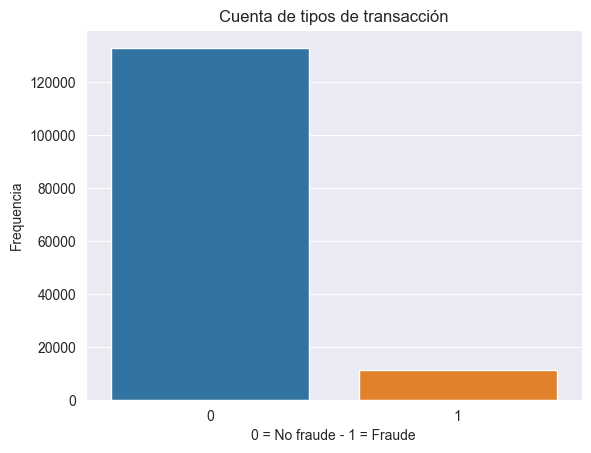

In [10]:
plt.title('Cuenta de tipos de transacción')
sns.countplot(x=datatrain.isFraud)
plt.xlabel('0 = No fraude - 1 = Fraude')
plt.ylabel('Frequencia')
plt.show()

Evidentemente nuestros datos se encuentran desvalanceados, lo cual es entendible debido a que la mayoria de las transacciones realizadas por nuestros usuarios son transacciones voluntarias. 

- Verificar la existencia datos faltantes en nuestro conjunto de datos.

In [11]:
datatrain.isnull().sum()

TransactionID        0
id_01                0
id_02             3361
id_03            77909
id_04            77909
                 ...  
V335             62192
V336             62192
V337             62192
V338             62192
V339             62192
Length: 434, dtype: int64

Porcentaje de valores nulos

In [12]:
# Obtener la cantidad de valores nulos en cada columna
valores_nulos_por_columna = datatrain.isnull().sum()

# Filtrar las columnas que tienen valores nulos
columnas_con_datos_faltantes = valores_nulos_por_columna[valores_nulos_por_columna > 0]
columnas_sin_datos_faltantes = valores_nulos_por_columna[valores_nulos_por_columna == 0]

# Número total de filas en el DataFrame
numero_total_filas = len(datatrain)

# Imprimir las columnas con datos faltantes, la cantidad de valores nulos y el porcentaje de datos faltantes
print("Columnas con datos faltantes y % de datos faltantes")
for columna, cantidad_nulos in columnas_con_datos_faltantes.items():
    porcentaje_datos_faltantes = (cantidad_nulos / numero_total_filas) * 100
    print(f"Columna '{columna}': {cantidad_nulos} valores nulos ({porcentaje_datos_faltantes:.2f}%)")

Columnas con datos faltantes y % de datos faltantes
Columna 'id_02': 3361 valores nulos (2.33%)
Columna 'id_03': 77909 valores nulos (54.02%)
Columna 'id_04': 77909 valores nulos (54.02%)
Columna 'id_05': 7368 valores nulos (5.11%)
Columna 'id_06': 7368 valores nulos (5.11%)
Columna 'id_07': 139078 valores nulos (96.43%)
Columna 'id_08': 139078 valores nulos (96.43%)
Columna 'id_09': 69307 valores nulos (48.05%)
Columna 'id_10': 69307 valores nulos (48.05%)
Columna 'id_11': 3255 valores nulos (2.26%)
Columna 'id_13': 16913 valores nulos (11.73%)
Columna 'id_14': 64189 valores nulos (44.50%)
Columna 'id_15': 3248 valores nulos (2.25%)
Columna 'id_16': 14893 valores nulos (10.33%)
Columna 'id_17': 4864 valores nulos (3.37%)
Columna 'id_18': 99120 valores nulos (68.72%)
Columna 'id_19': 4915 valores nulos (3.41%)
Columna 'id_20': 4972 valores nulos (3.45%)
Columna 'id_21': 139074 valores nulos (96.42%)
Columna 'id_22': 139064 valores nulos (96.42%)
Columna 'id_23': 139064 valores nulos (9

In [13]:
print("Columnas sin datos faltantes")
for columna in columnas_sin_datos_faltantes.index:
    print(columna)

Columnas sin datos faltantes
TransactionID
id_01
id_12
isFraud
TransactionDT
TransactionAmt
ProductCD
card1
C1
C2
C3
C4
C5
C6
C7
C8
C9
C10
C11
C12
C13
C14


Despues de verificar la cantidad de datos nulos en el dataset encontramos que muchas de las caracteristicas tienes datos o filas vacias, lo cual tiene sentido debido a que cada persona tiene diferente cantidad de direcciones o utiliza diferente cantidad de IP, ISP, Proxy, etc en donde realiza o ha realizado transacciones. 

Procederemos a eliminar de nuestro analisis las columnas que tienen datos nulos, debido a que no será información que aporte mucho valor. 

Nota: Intenté poner un umbral para despues completar con la media, pero debido a la falta de tiempo, simplificé el analisis. 

In [14]:
# Calcular la cantidad de valores nulos en cada columna
valores_nulos_por_columna = datatrain.isnull().sum()

# Calcular el número total de filas en el DataFrame
numero_total_filas = len(datatrain)

# Calcular el porcentaje de datos faltantes para cada columna
porcentaje_datos_faltantes = (valores_nulos_por_columna / numero_total_filas) * 100

# Definir un umbral del 5% para filtrar columnas
umbral = 0
# Filtrar las columnas que tienen más del 50% de datos nulos
columnas_a_eliminar = porcentaje_datos_faltantes[porcentaje_datos_faltantes > umbral].index

# Eliminar las columnas del DataFrame
datatrain = datatrain.drop(columns=columnas_a_eliminar)


In [15]:
# Calcular el umbral para el porcentaje de columnas con datos en blanco
umbral = len(datatrain.columns) * 0.2

# Eliminar filas que superen el umbral de columnas con datos en blanco
datatrain = datatrain.dropna(thresh=umbral)

In [16]:
datatrain

,TransactionID,id_01,id_12,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,C1,C2,...,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,2987004,0.0,NotFound,0,86506,50.000,H,4497,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1,2987008,-5.0,NotFound,0,86535,15.000,H,2803,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
2,2987010,-5.0,NotFound,0,86549,75.887,C,16496,1.0,4.0,...,0.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0
3,2987011,-5.0,NotFound,0,86555,16.495,C,4461,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,2987016,0.0,NotFound,0,86620,30.000,H,1790,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,NotFound,0,15810802,48.877,C,12019,1.0,9.0,...,0.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0
144229,3577526,-5.0,NotFound,1,15810876,250.000,R,1214,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
144230,3577529,-20.0,NotFound,0,15810912,73.838,C,5096,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
144231,3577531,-5.0,NotFound,0,15810935,400.000,R,6019,2.0,3.0,...,0.0,3.0,0.0,3.0,0.0,3.0,2.0,0.0,4.0,2.0


Adicional eliminaremos las filas que no contengan datos en addr, dist debido a que sin estos 2 datos no es posible que se determinen otros datos fundamentales para detectar fraudes como direcciones asocidas, entre otros. 

In [17]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TransactionID   144233 non-null  int64  
 1   id_01           144233 non-null  float64
 2   id_12           144233 non-null  object 
 3   isFraud         144233 non-null  int64  
 4   TransactionDT   144233 non-null  int64  
 5   TransactionAmt  144233 non-null  float64
 6   ProductCD       144233 non-null  object 
 7   card1           144233 non-null  int64  
 8   C1              144233 non-null  float64
 9   C2              144233 non-null  float64
 10  C3              144233 non-null  float64
 11  C4              144233 non-null  float64
 12  C5              144233 non-null  float64
 13  C6              144233 non-null  float64
 14  C7              144233 non-null  float64
 15  C8              144233 non-null  float64
 16  C9              144233 non-null  float64
 17  C10       

In [18]:
datatrain.describe()

,TransactionID,id_01,isFraud,TransactionDT,TransactionAmt,card1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,1.442330e+05,144233.000000,144233.000000,1.442330e+05,144233.000000,144233.000000,144233.000000,144233.000000,144233.000000,144233.000000,144233.0,144233.000000,144233.000000,144233.000000,144233.0,144233.000000,144233.000000,144233.000000,144233.000000,144233.000000
mean,3.236329e+06,-10.170502,0.078470,6.166958e+06,83.554533,9879.012528,27.793681,34.344533,0.023032,15.603558,0.0,15.583036,10.512830,19.395173,0.0,19.787483,20.359425,14.811687,20.517850,10.499685
std,1.788496e+05,14.347949,0.268911,4.807714e+06,99.850258,5047.643179,249.745336,291.306999,0.303819,131.944756,0.0,132.514335,117.037122,181.039192,0.0,181.760988,176.778700,164.194903,165.660021,87.186134
min,2.987004e+06,-100.000000,0.000000,8.650600e+04,0.251000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.077142e+06,-10.000000,0.000000,1.885289e+06,25.453000,5713.000000,1.000000,1.000000,0.000000,1.000000,0.0,1.000000,0.000000,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000
50%,3.198818e+06,-5.000000,0.000000,4.913738e+06,50.000000,9633.000000,1.000000,1.000000,0.000000,1.000000,0.0,1.000000,0.000000,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000
75%,3.392923e+06,-5.000000,0.000000,1.025794e+07,100.000000,15063.000000,2.000000,2.000000,0.000000,1.000000,0.0,1.000000,1.000000,2.000000,0.0,1.000000,1.000000,1.000000,2.000000,1.000000
max,3.577534e+06,0.000000,1.000000,1.581103e+07,1800.000000,18396.000000,4685.000000,5691.000000,26.000000,2253.000000,0.0,2253.000000,2255.000000,3331.000000,0.0,3257.000000,3188.000000,3188.000000,2918.000000,1429.000000


- Verificar correlación entre variables 

Verificar el número de la columa en la que está mi varible de interes

In [19]:
numero_columna = datatrain.columns.get_loc('isFraud')

In [20]:
numero_columna

3

Explorar cuales son los datos que son tipo object

In [21]:
columnas_enteras = datatrain.select_dtypes(include=['object']).columns.tolist()
# Imprimir las columnas enteras
for columna in columnas_enteras:
    print(columna)

id_12
ProductCD


Pasar estas varibles tipo objects a variables numericas

In [22]:
# Aplicar One-Hot Encoding a las columnas 'id_12' y 'ProductCD'
datatrain_enc = pd.get_dummies(datatrain, columns=['id_12', 'ProductCD'], dummy_na=False)

In [23]:
# Recorre las columnas específicas y convierte 'True' y 'False' a 1 y 0
columnas_a_convertir = ['id_12_Found', 'id_12_NotFound', 'ProductCD_C', 'ProductCD_H', 'ProductCD_R', 'ProductCD_S']

for columna in columnas_a_convertir:
    datatrain_enc[columna] = datatrain_enc[columna].astype(int)


In [24]:
datatrain_enc

,TransactionID,id_01,isFraud,TransactionDT,TransactionAmt,card1,C1,C2,C3,C4,...,C11,C12,C13,C14,id_12_Found,id_12_NotFound,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S
0,2987004,0.0,0,86506,50.000,4497,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0,1,0,1,0,0
1,2987008,-5.0,0,86535,15.000,2803,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0,1,0,1,0,0
2,2987010,-5.0,0,86549,75.887,16496,1.0,4.0,0.0,1.0,...,2.0,2.0,2.0,1.0,0,1,1,0,0,0
3,2987011,-5.0,0,86555,16.495,4461,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0,1,1,0,0,0
4,2987016,0.0,0,86620,30.000,1790,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,0,15810802,48.877,12019,1.0,9.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0,1,1,0,0,0
144229,3577526,-5.0,1,15810876,250.000,1214,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0,1,0,0,1,0
144230,3577529,-20.0,0,15810912,73.838,5096,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0,1,1,0,0,0
144231,3577531,-5.0,0,15810935,400.000,6019,2.0,3.0,0.0,4.0,...,2.0,0.0,4.0,2.0,0,1,0,0,1,0


- Correlación entre las varibles

In [25]:
corr = datatrain_enc.iloc[:, 0:2].join(datatrain_enc.iloc[:, 3:]).corr()
shape = corr.shape

In [26]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

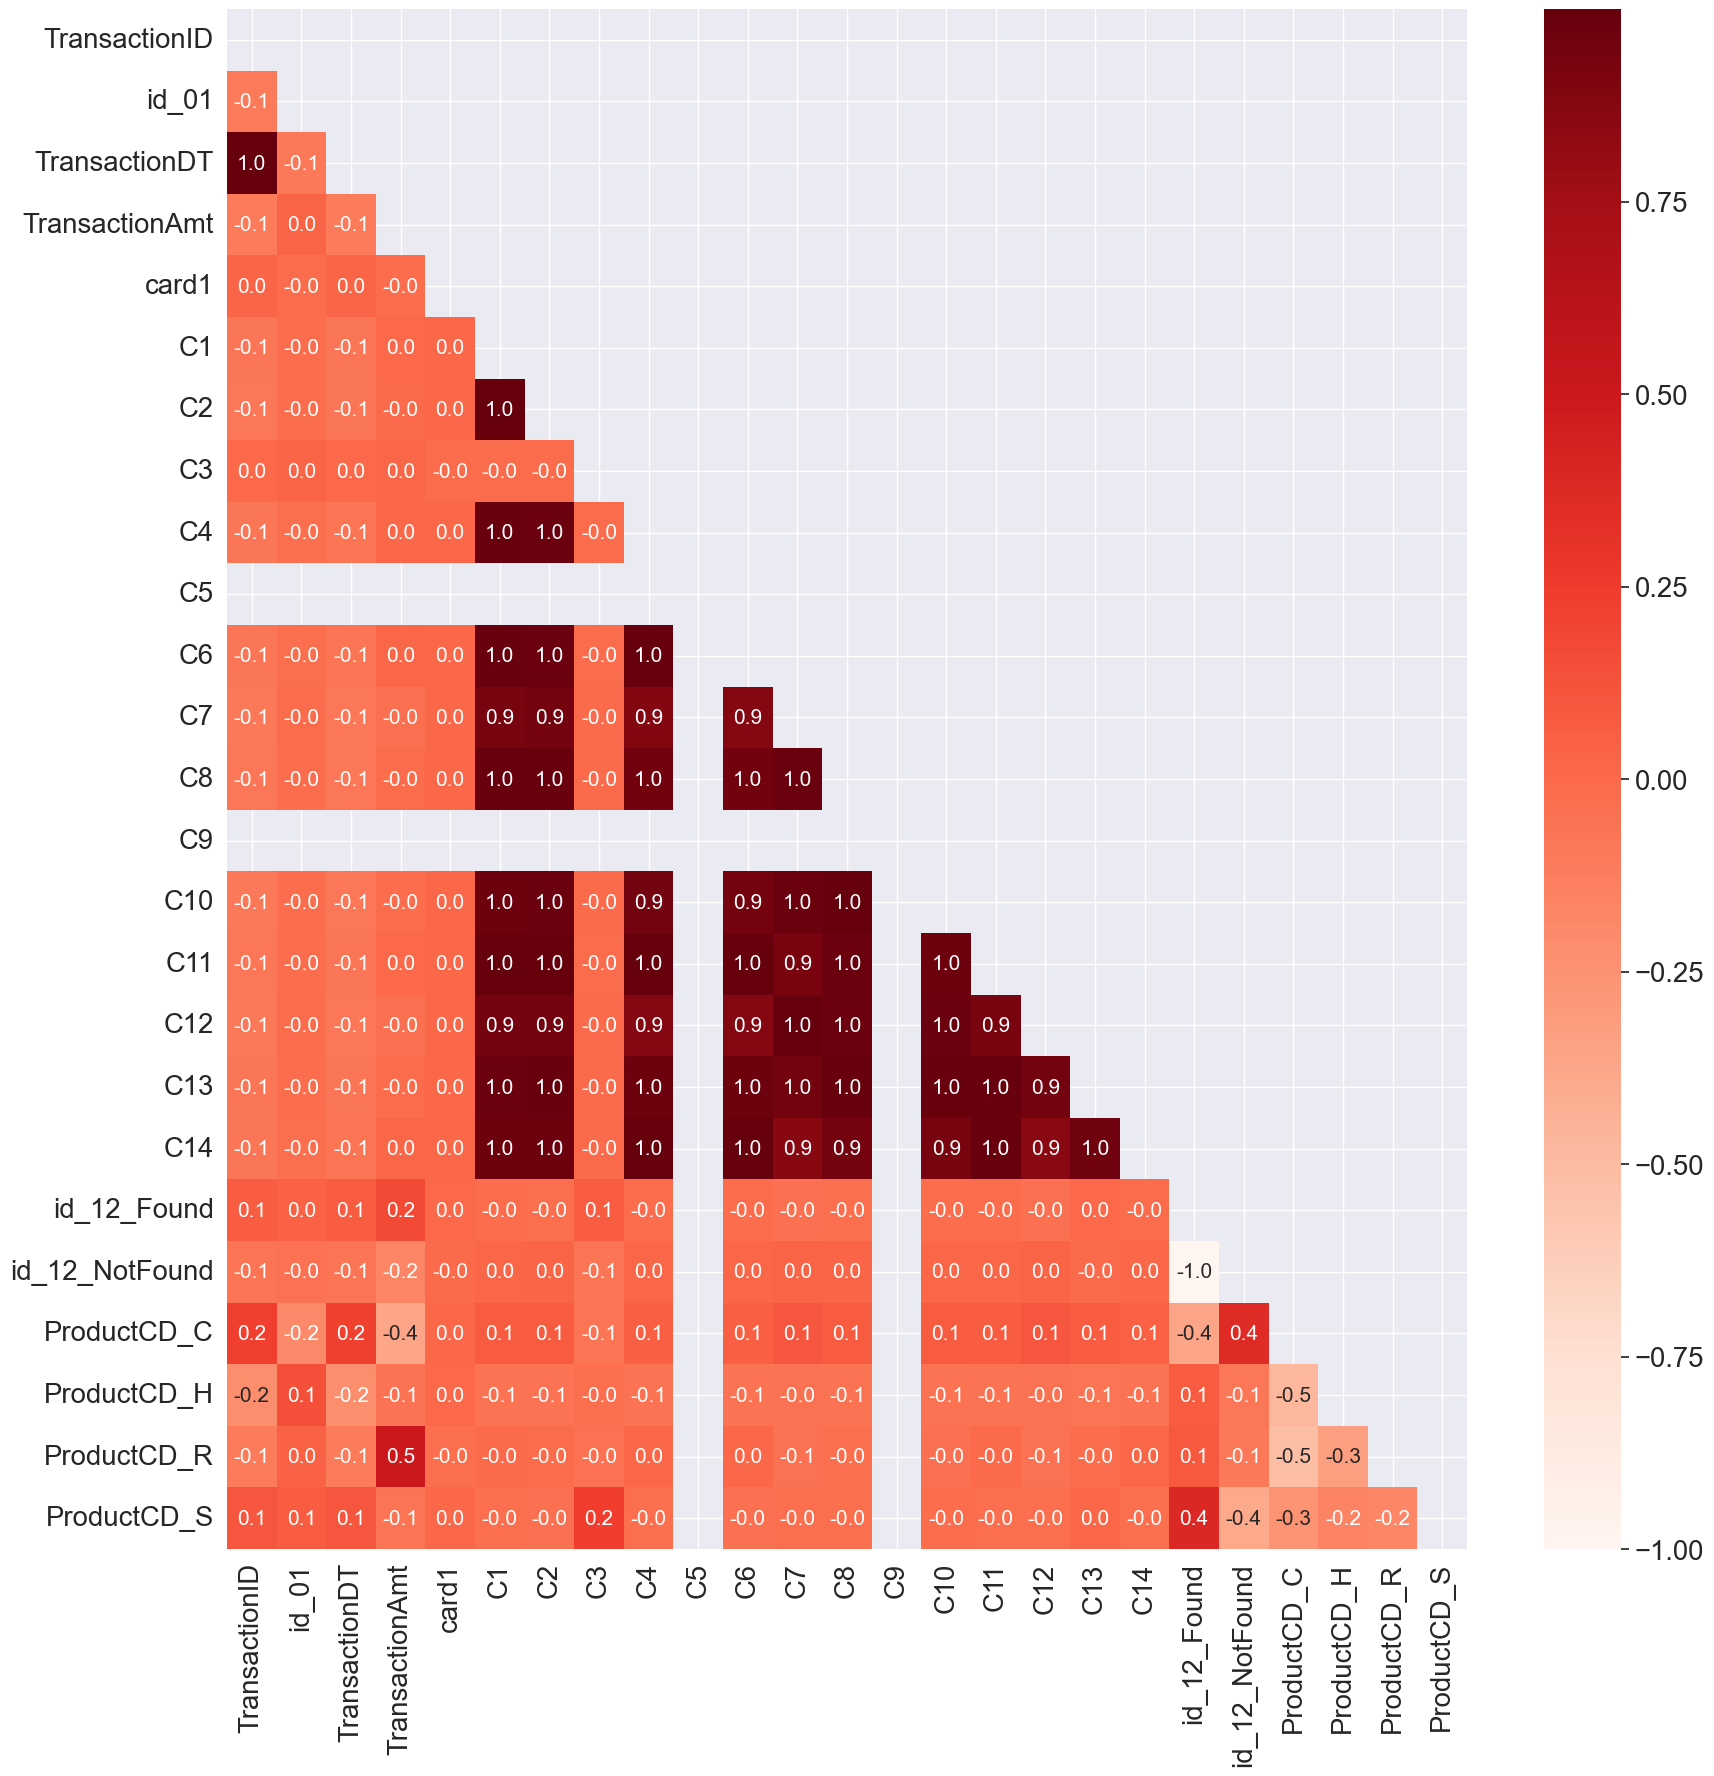

In [27]:
sns.set(font_scale=1.8)
plt.figure(figsize=(20,20))
sns.heatmap(corr, mask=mask, cbar=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Reds');

- Reducir dimensionalidad por medio de eliminación de columnas altamente relacionadas

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
X = datatrain_enc.values

- Eliminar columnas altamente relacionadas de acuerdo con la tabla de correlación. 

Inicialmente eliminamos las columnas C2, C4, C6, C11 y C14, estás estan altamente relacionadas con la C1, la cual será la que quedará para nuestro analisis. 

In [30]:
print(datatrain_enc.columns)

Index(['TransactionID', 'id_01', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
       'C11', 'C12', 'C13', 'C14', 'id_12_Found', 'id_12_NotFound',
       'ProductCD_C', 'ProductCD_H', 'ProductCD_R', 'ProductCD_S'],
      dtype='object')


In [31]:
# Lista de las columnas que deseas eliminar
columnas_a_eliminar = ['C2', 'C4', 'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13','C14']

# Eliminar las columnas especificadas
datatrain_enc = datatrain_enc.drop(columns=columnas_a_eliminar)

Nuevamente verificamos correlacion

In [32]:
corr = datatrain_enc.iloc[:, 0:2].join(datatrain_enc.iloc[:, 3:]).corr()
shape = corr.shape

In [33]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

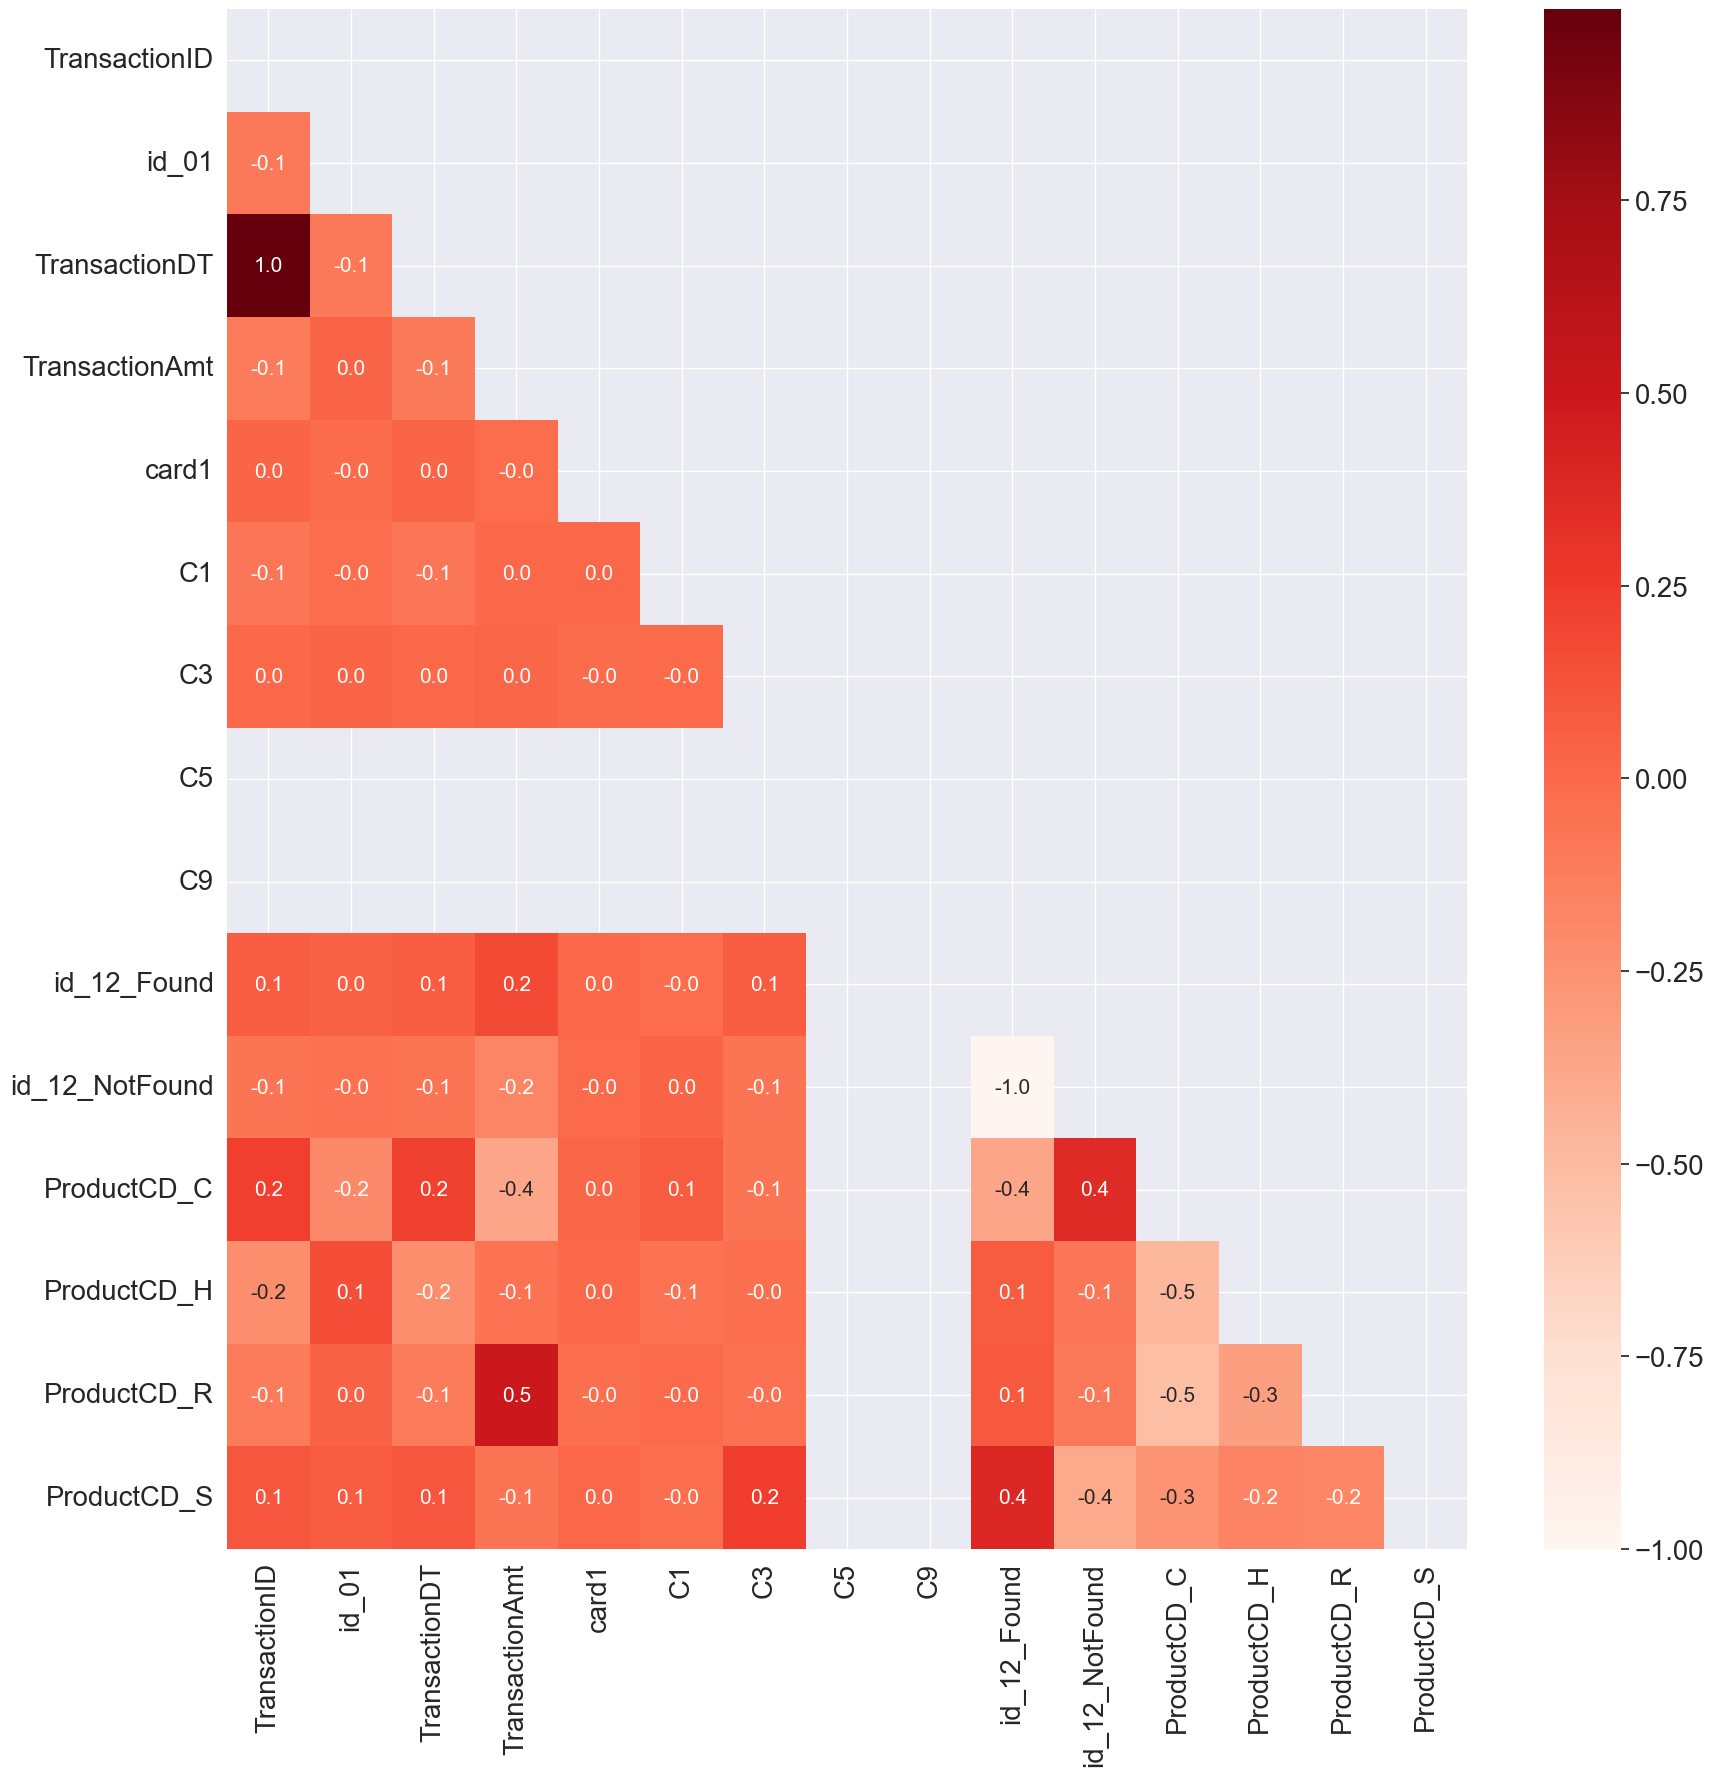

In [34]:
sns.set(font_scale=1.8)
plt.figure(figsize=(20,20))
sns.heatmap(corr, mask=mask, cbar=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Reds');

Procedemos a eliminar la columna TransactionID ya que tiene una relación de 1 con Transaction DT

In [35]:
# Lista de las columnas que deseas eliminar
columna_a_eliminar = ['TransactionID']

# Eliminar las columnas especificadas
datatrain_enc = datatrain_enc.drop(columns=columna_a_eliminar)

Trazamos histograma de cada caracteristica

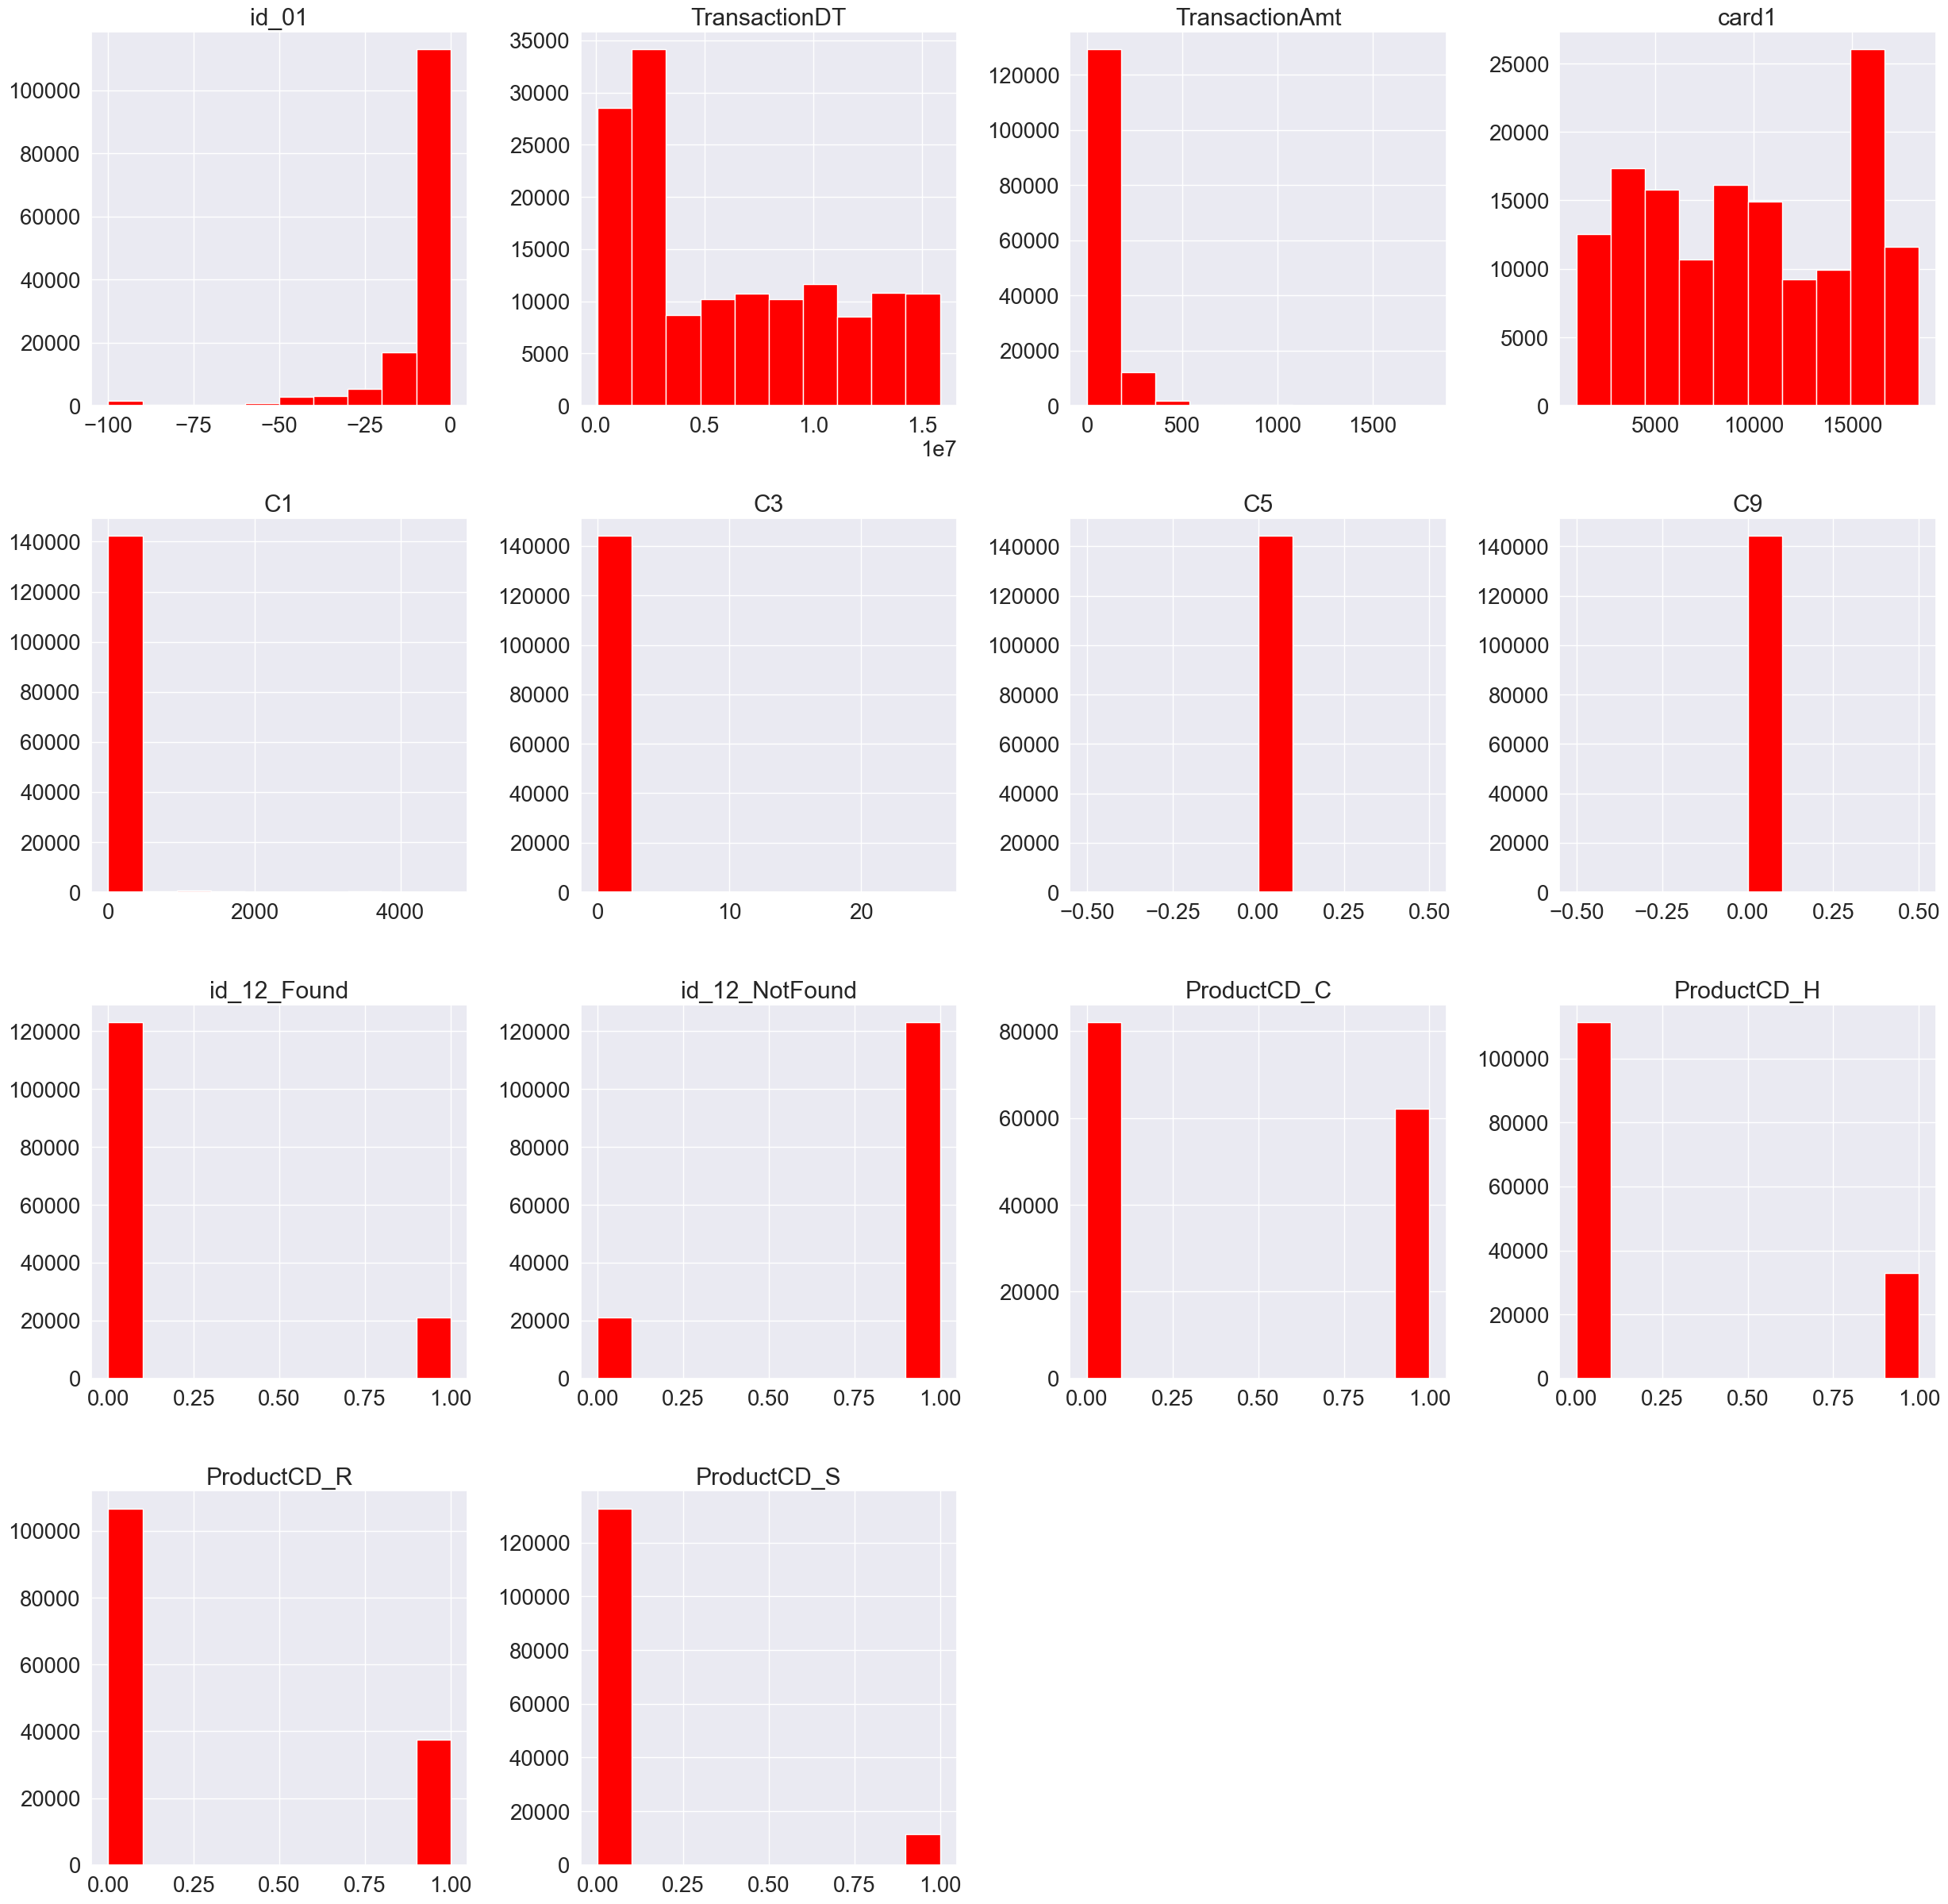

In [36]:
sns.set(font_scale=1.8)
datatrain_enc.iloc[:, 0:1].join(datatrain_enc.iloc[:, 2:]).hist(figsize = (30,30), color = 'red');

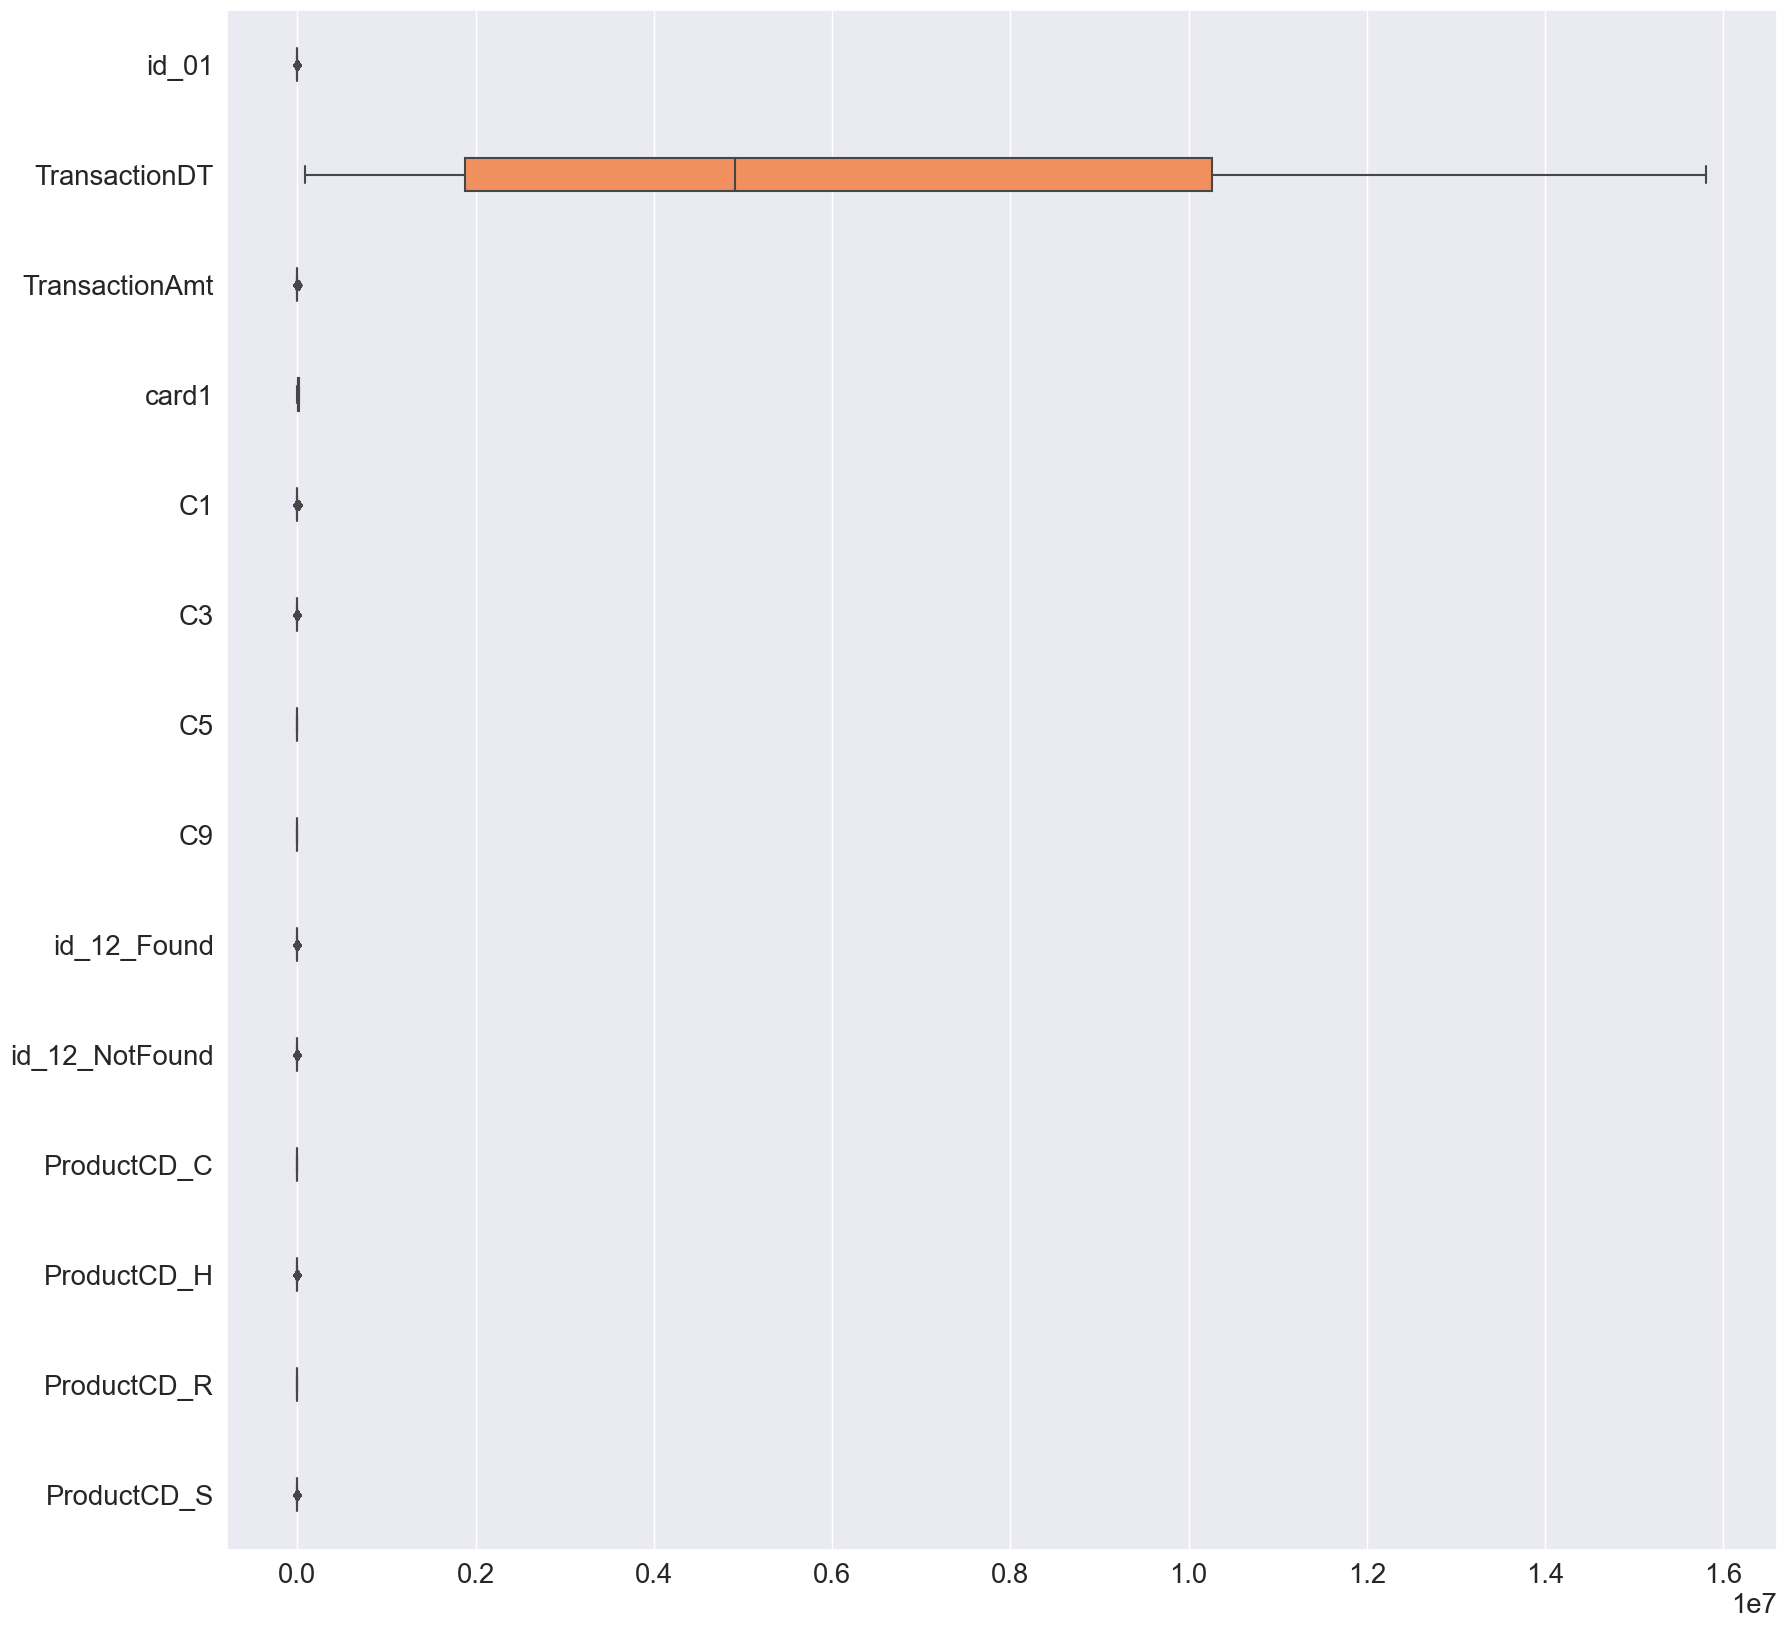

In [37]:
sns.set(font_scale=1.8)
plt.figure(figsize=(20,20))
sns.boxplot(data= datatrain_enc.drop(['isFraud'], axis=1) ,width=0.3 , saturation=0.9,orient="h");

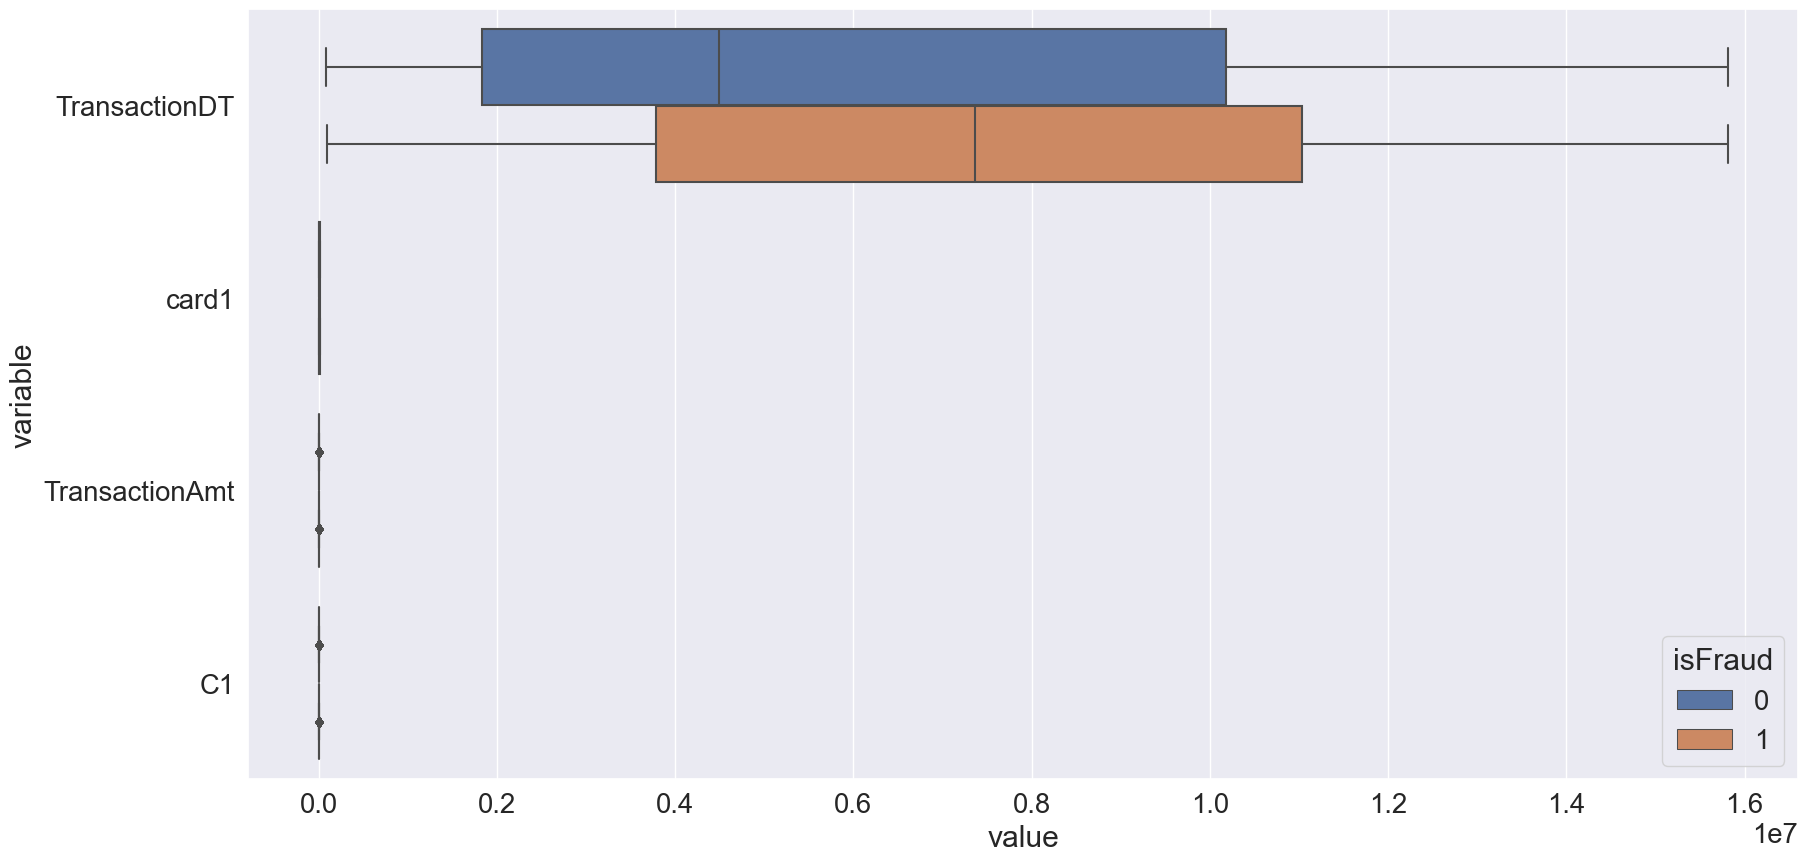

In [38]:
melted_data = pd.melt(datatrain_enc, id_vars = "isFraud",value_vars = ['TransactionDT', 'card1', 
                                                              'TransactionAmt','C1'])
sns.set(font_scale=1.8)
plt.figure(figsize = (20,10))
sns.boxplot(x = "value", y = "variable", hue="isFraud",data= melted_data);

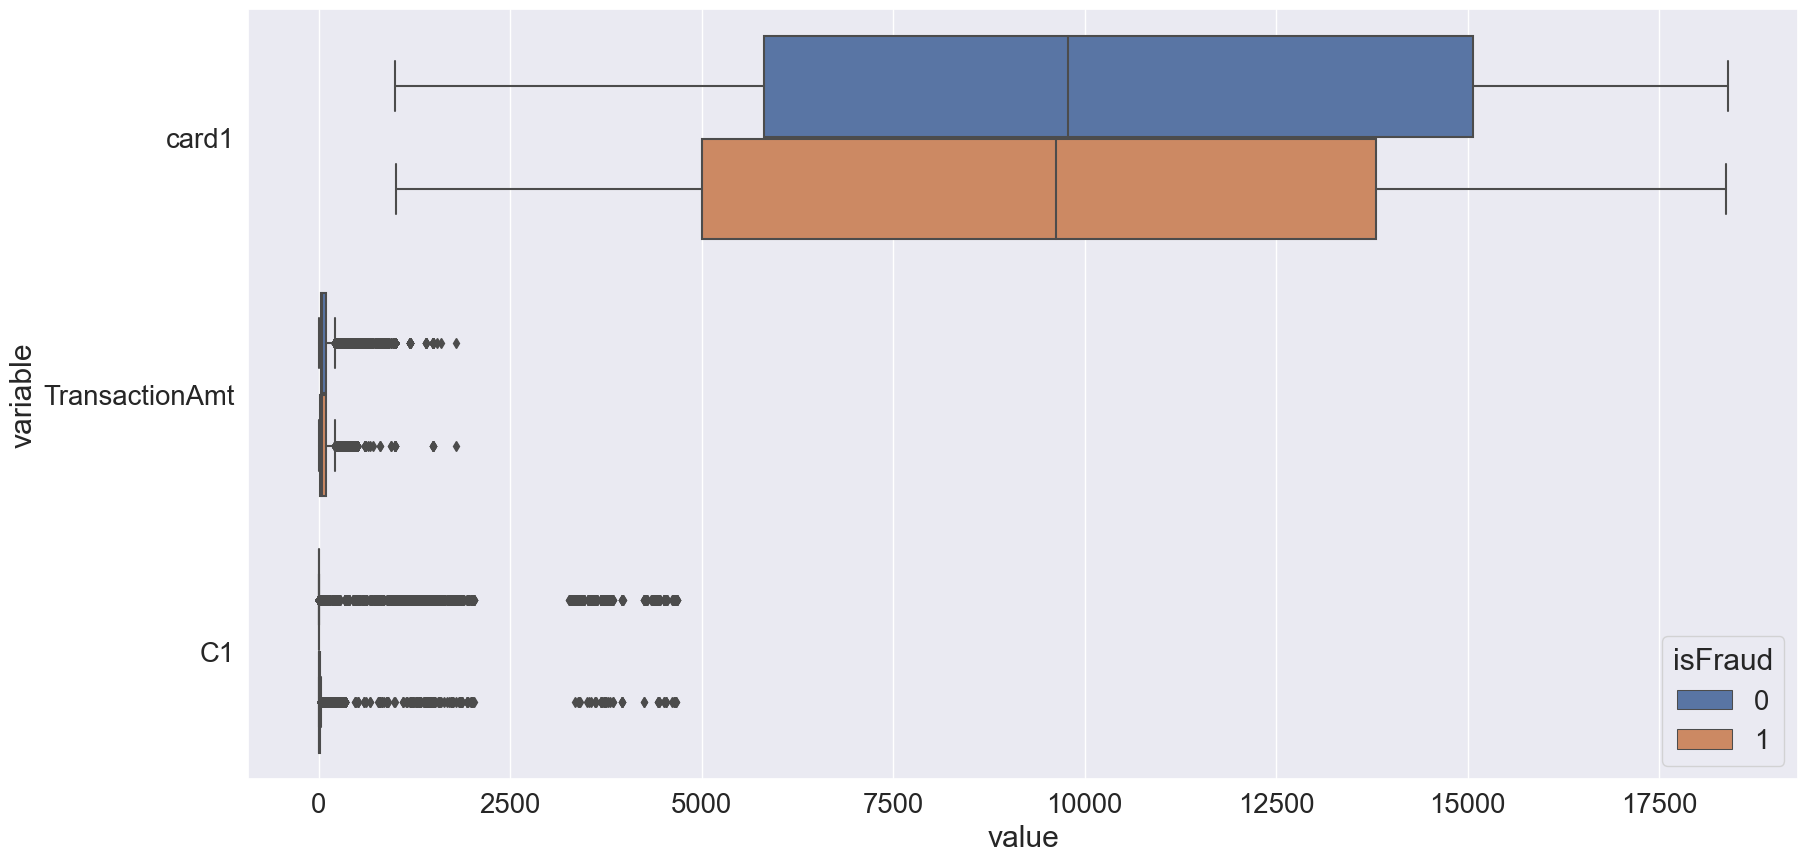

In [39]:
melted_data = pd.melt(datatrain_enc, id_vars = "isFraud",value_vars = ['card1', 
                                                              'TransactionAmt','C1'])
sns.set(font_scale=1.8)
plt.figure(figsize = (20,10))
sns.boxplot(x = "value", y = "variable", hue="isFraud",data= melted_data);

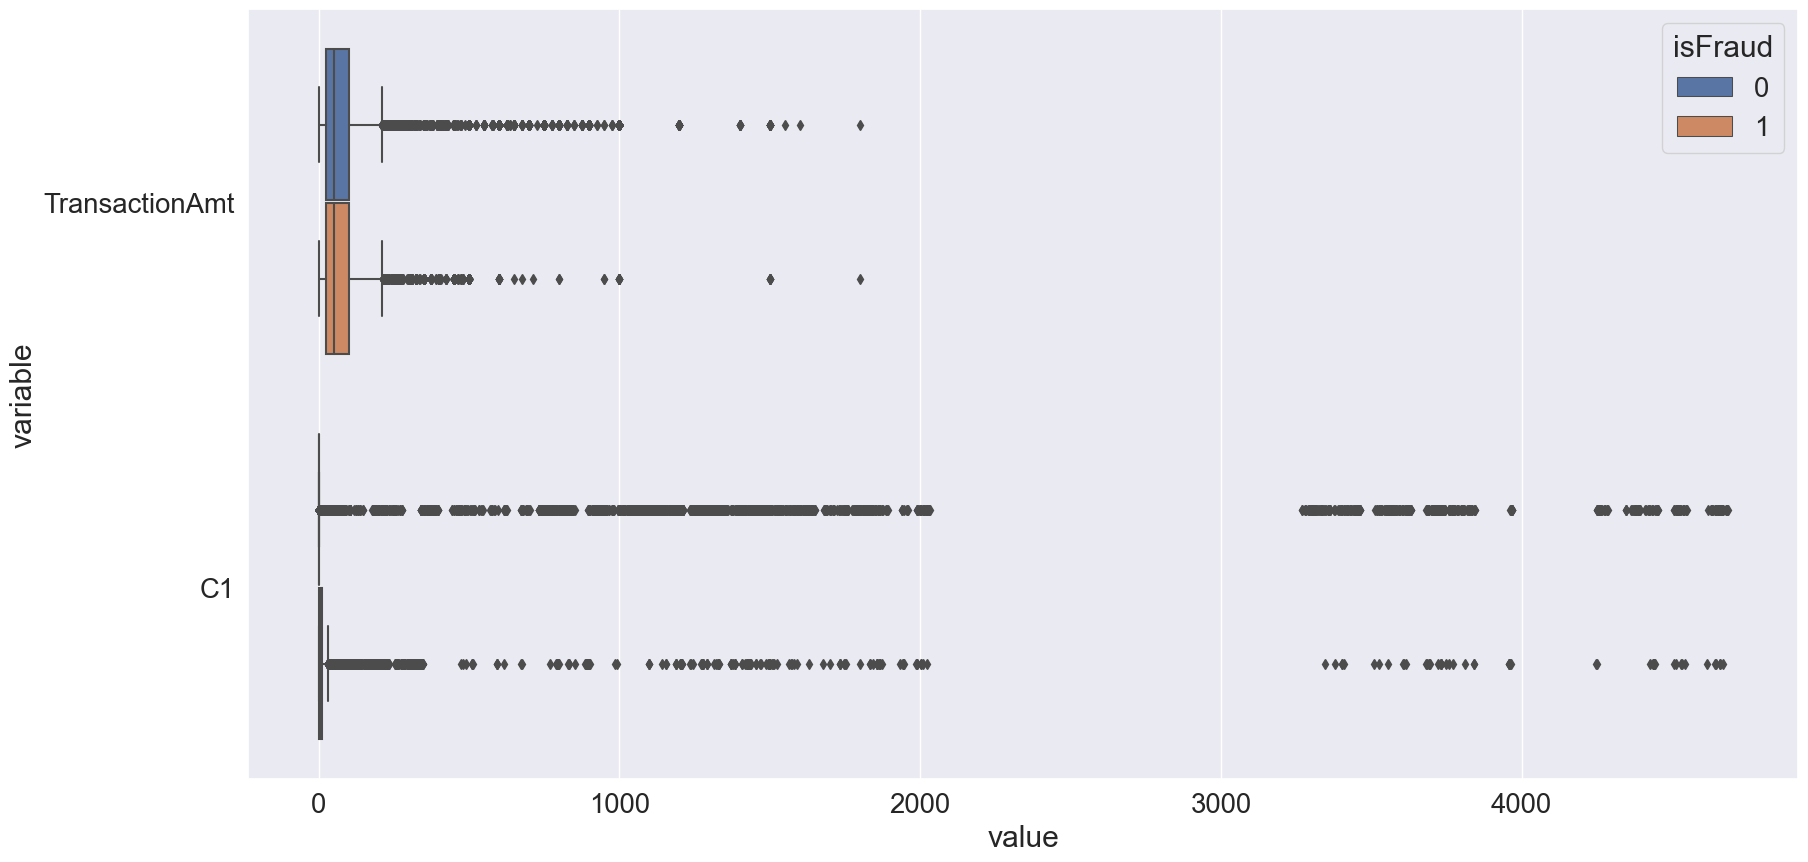

In [40]:
melted_data = pd.melt(datatrain_enc, id_vars = "isFraud",value_vars = [ 
                                                              'TransactionAmt','C1'])
sns.set(font_scale=1.8)
plt.figure(figsize = (20,10))
sns.boxplot(x = "value", y = "variable", hue="isFraud",data= melted_data);

De los graficos anteriores podemos inferir que TransactionDT tiene poca disperción, aunque la media es muy parecida, tiene ligera tendencia a ser más alto cuando es un Fraude, la caracteristica o columna cart1 se comporta exactamente igual. 

Por otro lado, en cuanto a TransactionAmt y C1, tiene una dispersión de los datos muy grande, aunque aparentemente la media de los fraudes y no fraudes es baja, tienden a tener valores muy altos para cada categoria, sin embargo, en caunto a estas 2 varibles se observa mayor dispersión en la categoria 0.

In [41]:
print(datatrain_enc.columns)

Index(['id_01', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'C1',
       'C3', 'C5', 'C9', 'id_12_Found', 'id_12_NotFound', 'ProductCD_C',
       'ProductCD_H', 'ProductCD_R', 'ProductCD_S'],
      dtype='object')


# Ejercicio 5 - Modelos de Clasificación

Se evaluará los modelos:
- K-NN 
- LogisticRegression (En el ejercicio se sugirió Ridge y Lasso, sin embargo, estos son modelos para Regresión y no para clasificación)


Definir datos y target dentro de mi Dataframe

In [55]:
# Definimos las columnas "data" y "target"
data_columns = ['TransactionDT', 'id_01', 'TransactionAmt', 'card1', 'C1', 'C3', 'C5', 'C9', 'id_12_Found', 'id_12_NotFound', 'ProductCD_C', 'ProductCD_H', 'ProductCD_R', 'ProductCD_S']
target_column = 'isFraud'

# Creamos X (datos) y y (objetivo)
X = datatrain_enc[data_columns]
y = datatrain_enc[target_column]

In [56]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

In [59]:
param_grid = [
    {
        'classifier': [KNeighborsClassifier()],
        'preprocessing': [StandardScaler(), None],
        'classifier__n_neighbors': [ 7, 9],
        'classifier__weights': ['distance'],
        'classifier__p': [1]
    },
    {
        'classifier': [LogisticRegression()],
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear'],
        'classifier__max_iter': [100, 500],
        'classifier__multi_class': ['ovr', 'multinomial'],
        'classifier__class_weight': [None, 'balanced']
    },
    {
        'classifier': [SVC()],
        'preprocessing': [StandardScaler(), None],
        'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    {
        'classifier': [GaussianNB()]
    },
    {
        'classifier': [XGBClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 4, 5],
        'classifier__min_child_weight': [1, 2, 3]
    }
]


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier': KNeighborsClassifier(n_neighbors=9, p=1, weights='distance'), 'classifier__n_neighbors': 9, 'classifier__p': 1, 'classifier__weights': 'distance', 'preprocessing': StandardScaler()}

Best cross-validation score: 0.94
Test-set score: 0.95


Inicialmente usamos un pipeline con GrindSearch solo para el modelo KNN, con esto tenemos que las mejores caracteristicas son:
n_neigbors=9
p=1
weights='distance'

Best cross-validation score: 0.94
Test-set score: 0.95

A la 1:45 pm se inició a evaluar utiliznado todos los modelos del ejercicio, si se termina antes de concluir la clase se evaluará el modelo y se darán conclusiones, de lo contrario, quedará hasta el código. 